# Problem Set 5
By: Bethany Bailey
## Problem 1
### (a)

In [86]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import norm
import scipy.optimize as opt
import scipy.special as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import math

In [8]:
# Load data into array and dataframe
data = np.loadtxt('clms.txt', delimiter=",")
df = pd.read_csv('clms.txt', header=None)

In [10]:
# Calculate and report the mean, median, maximum, minimum, and stan- dard deviation of monthly
# health expenditures for these data.
df.describe()

,0
count,10619.000000
mean,720.277975
std,3972.850824
min,0.010000
25%,74.450000
50%,172.210000
75%,451.535000
max,227967.250000


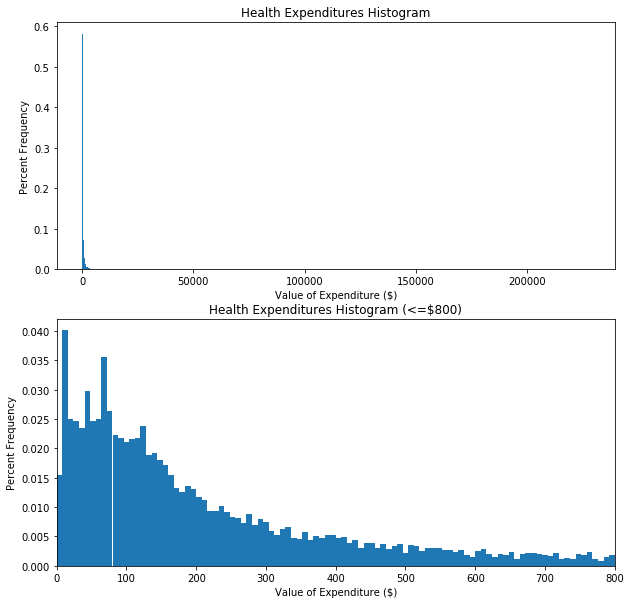

In [13]:
# Plot two histograms of the data in which the y-axis gives the percent of observations 
# in the particular bin of health expenditures and the x-axis gives the value of 
# monthly health expenditures.
plt.figure(figsize=(10, 10))

weights = (1 / data.shape[0]) * np.ones_like(data)

plt.subplot(2, 1, 1)
plt.hist(data, bins=1000, weights=weights)
plt.title('Health Expenditures Histogram')
plt.xlabel('Value of Expenditure ($)')
plt.ylabel('Percent Frequency')

plt.subplot(2, 1, 2)
plt.hist(data, bins=100, range=(0, 800), weights=weights)
plt.xlim(0, 800)
plt.title('Health Expenditures Histogram (<=$800)')
plt.xlabel('Value of Expenditure ($)')
plt.ylabel('Percent Frequency')

plt.show()

We might prefer the second histogram because it gives us a much better idea of the distribution of the data. It removes outliers but still covers most of the data.

### (b)

In [66]:
# Define functions
def gam_pdf(x, alpha, beta): 
    '''Find the gamma prob dist for given data.'''
    pdf = (1 / (beta ** alpha * math.gamma(alpha))) * x ** (alpha - 1) * np.exp(-1 * x / beta)
    return pdf
    
def log_lik_gam(xvals, alpha, beta):
    '''Find the log likelihood of the gamma pdf for given data.'''
    pdf_vals = gam_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gam(params, *args):
    '''Compute the negative of the log likelihood function
    given parameters and data.'''
    a, b = params
    x = args[0]
    log_lik_val = log_lik_gam(x, a, b)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val

In [67]:
# Initial guesses 
b_init = data.var()/data.mean()
a_init = data.mean()/ b_init
params_init = np.array([a_init, b_init])

In [68]:
results = opt.minimize(crit_gam, params_init, args=data, 
                       method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
alpha_MLE, beta_MLE = results.x
print('alpha_MLE=', alpha_MLE)
print('beta_MLE=', beta_MLE)
MLE_ga = log_lik_gam(data, alpha_MLE, beta_MLE)
print('MLE log-likelihood: ', MLE_ga)

alpha_MLE= 0.221755318824
beta_MLE= 21911.0646993
MLE log-likelihood:  -82076.4516057


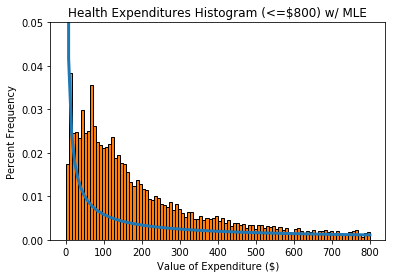

In [69]:
x = np.linspace(1e-5, 800, 100)
plt.plot(x, 8 * gamma_pdf(x, alpha_MLE, beta_MLE), lw=3)
mask = data <= 800
plt.hist(data[mask], 100, weights=weights[mask], edgecolor='k')
plt.ylim(0, 0.05)
plt.title('Health Expenditures Histogram (<=$800) w/ MLE')
plt.xlabel('Value of Expenditure ($)')
plt.ylabel('Percent Frequency')
plt.show()

### (c)

In [39]:
# Define functions for generalized gamma
def gg_pdf(x, alpha, beta, m): 
    '''Find the generalized gamma prob dist for given data.'''
    f = (m / (beta ** alpha * math.gamma(alpha / m))) * x ** (alpha - 1) * np.exp( -1 * (x / beta) ** m)
    return f
    
def log_lik_GG(xvals, alpha, beta, m):
    '''Find the generalized log likelihood of the gamma pdf for given data.'''
    pdf_vals = gg_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GG(params, *args):
    '''Compute the negative of the log likelihood function
    given parameters and data for the generalized gamma.'''
    alpha, beta, m = params
    xvals = args[0]
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [41]:
# Initial guesses
beta_init = beta_MLE
alpha_init = alpha_MLE
m_init = 1
params_init_GG = np.array([alpha_init, beta_init, m_init])

In [42]:
results_GG = opt.minimize(crit_GG, params_init_GG, args=data, 
                       method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None), (1e-5, None)))
alpha_MLE_GG, beta_MLE_GG, m_MLE_GG = results_GG.x
print('alpha_MLE_GG=', alpha_MLE_GG, ', beta_MLE_GG=', beta_MLE_GG, ', m_MLE_GG=', m_MLE_GG)
MLE_GG = log_lik_GG(data, alpha_MLE_GG, beta_MLE_GG, m_MLE_GG)
print('MLE log-likelihood: ', MLE_GG)

alpha_MLE_GG= 0.221764850189 , beta_MLE_GG= 21911.0644282 , m_MLE_GG= 0.997072924587
MLE log-likelihood:  -82076.4467958


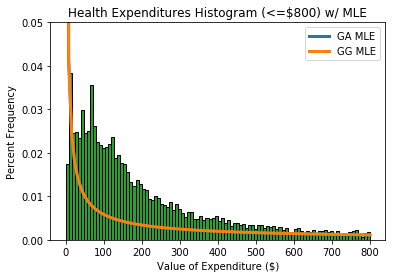

In [44]:
plt.plot(x, 8 * gamma_pdf(x, alpha_MLE, beta_MLE), lw=3, label="GA MLE")
plt.plot(x, 8 * gg_pdf(x, alpha_MLE_GG, beta_MLE_GG, m_MLE_GG), lw=3, label="GG MLE")
mask = data <= 800
plt.hist(data[mask], 100, weights=weights[mask], edgecolor='k')
plt.ylim(0, 0.05)
plt.title('Health Expenditures Histogram (<=$800) w/ MLE')
plt.xlabel('Value of Expenditure ($)')
plt.ylabel('Percent Frequency')
plt.legend()
plt.show()

### (d)

In [55]:
# Define functions for generalized beta 2
def GB2_pdf(x, a, b, p, q): 
    '''Find the generalized beta 2 prob dist for given data.'''
    f = a * (x ** (a*p-1)) / ((b ** (a*p)) * sp.beta(p,q) * ((1 + (x / b) ** a) ** (p + q)))
    return f
    
def log_lik_GB2(xvals, a, b, p, q):
    '''Find the generalized log likelihood of the generalized beta 2 for given data.'''
    pdf_vals = GB2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GB2(params, *args):
    '''Compute the negative of the log likelihood function
    given parameters and data for the generalized beta 2.'''
    a, b, p, q = params
    xvals = args[0]
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [56]:
# Initial guesses
q_init_gb2 = 200
b_init_gb2 = (q_init_gb2**(1 / m_MLE_GG))*beta_MLE_GG
a_init_gb2 = m_MLE_GG
p_init_gb2 = alpha_MLE_GG / m_MLE_GG
params_init_gb2 = np.array([a_init_gb2, b_init_gb2, p_init_gb2, q_init_gb2])

In [61]:
results_gb2 = opt.minimize(crit_GB2, params_init_gb2, args=data, 
                       method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None)))
alpha_MLE_GB2, beta_MLE_GB2, m_MLE_GB2, q_MLE_GB2 = results_gb2.x
print('alpha_MLE_GB2=', alpha_MLE_GB2, ', beta_MLE_GB2=', beta_MLE_GB2)
print('m_MLE_GB2=', m_MLE_GB2, ',q_MLE_GB2=', q_MLE_GB2)
MLE_GB2 = log_lik_GB2(data, alpha_MLE_GB2, beta_MLE_GB2, m_MLE_GB2, q_MLE_GB2)
print('MLE log-likelihood: ', MLE_GB2)

alpha_MLE_GB2= 0.104423946253 , beta_MLE_GB2= 4450907.19077
m_MLE_GB2= 54.6366357148 ,q_MLE_GB2= 155.687194434
MLE log-likelihood:  -74876.0473853


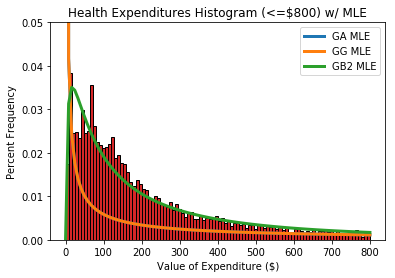

In [62]:
plt.plot(x, 8 * gamma_pdf(x, alpha_MLE, beta_MLE), lw=3, label="GA MLE")
plt.plot(x, 8 * gg_pdf(x, alpha_MLE_GG, beta_MLE_GG, m_MLE_GG), lw=3, label="GG MLE")
plt.plot(x, 8 * GB2_pdf(x, alpha_MLE_GB2, beta_MLE_GB2, m_MLE_GB2, q_MLE_GB2), lw=3, label="GB2 MLE")
mask = data <= 800
plt.hist(data[mask], 100, weights=weights[mask], edgecolor='k')
plt.ylim(0, 0.05)
plt.title('Health Expenditures Histogram (<=$800) w/ MLE')
plt.xlabel('Value of Expenditure ($)')
plt.ylabel('Percent Frequency')
plt.legend()
plt.show()

### (e)

In [63]:
# Define likelihood ratio test function
def likelihood_ratio_test(lmin, lmax):
    return(2*abs((lmax-lmin)))

In [71]:
LR1 = likelihood_ratio_test(MLE_ga, MLE_GB2)
p1 = 1 - sts.chi2.cdf(LR1, 4) 

LR2 = likelihood_ratio_test(MLE_GG, MLE_GB2)
p2 = 1 - sts.chi2.cdf(LR2, 4)

print('chi-squared of GA (b) with GB2 (d) and 4 degrees of freedom, p-value = ', p1)
print('chi-squared of GG (c) with GB2 (d) and 4 degrees of freedom, p-value = ', p2)

chi-squared of GA (b) with GB2 (d) and 4 degrees of freedom, p-value =  0.0
chi-squared of GG (c) with GB2 (d) and 4 degrees of freedom, p-value =  0.0


### (f)

In [78]:
# Find likelihood of having a monthly health care claim of more than $1,000
prob_GB2_1000 = integrate.quad(GB2_pdf,1000, np.inf, args = (alpha_MLE_GB2, beta_MLE_GB2, m_MLE_GB2, q_MLE_GB2))                                                             
prob_GA_1000 = integrate.quad(gam_pdf, 1000, np.inf, args = (alpha_MLE_GG, beta_MLE_GG))

print("The probability using GB2 estimation of healthcare claim above $1000 is", prob_GB2_1000[0])
print("The probability using GA estimation of healthcare claim above $1000 is", prob_GA_1000[0])

The probability using GB2 estimation of healthcare claim above $1000 is 0.13166906160951763
The probability using GA estimation of healthcare claim above $1000 is 0.45197465310799084


## Problem 2
### (a)

In [83]:
# Load data
macro = pd.read_csv('MacroSeries.txt', header=None)
macro.head()

,0,1,2,3,4
0,1.128323e+07,8.040697e+06,1.120211e+07,1.008852,1.931398e+07
1,1.215464e+07,8.030754e+06,1.206726e+07,1.088112,2.080561e+07
2,1.097303e+07,8.650974e+06,1.089414e+07,0.911904,1.878300e+07
3,9.711635e+06,7.809971e+06,9.641815e+06,0.893986,1.662382e+07
4,9.245673e+06,6.912184e+06,9.179203e+06,0.961637,1.582621e+07


In [84]:
macro.columns = ['c', 'k', 'w', 'r', 'y']

In [93]:
# Define Equations
def get_z(w, k, alpha):
    z = np.log(w) - np.log(1 - alpha) - alpha * np.log(k)
    return z

def log_pdf(z, rho, mu, sigma):
    z[0] = mu
    mean = rho * z[:-1] + (1 - rho) * mu
    log_lik_vals = norm.logpdf(z, np.hstack([mu, mean]), sigma)
    return log_lik_vals

def crit1(params, *args):
    alpha, rho, mu, sigma = params
    w, k  = args
    neg_log_lik_vals = -(log_pdf(get_z(w, k, alpha), rho, mu, sigma).sum())
    
    return neg_log_lik_vals

In [97]:
# Set initial parameters
alpha_init = 0.5
rho_init = 0.5
mu_init = 5
sigma_init = 0.8
params_init = (alpha_init, rho_init, mu_init, sigma_init)

In [98]:
mle_args = (macro.w, macro.k)
results = opt.minimize(crit1, params_init, args=mle_args, method ='L-BFGS-B', 
                             bounds=((1e-2, 0.99), (-0.99, 0.99), (1e-2, None), (1e-2, None)))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results.x
log_like_val = results.fun
print(results)
print('alpha_MLE= ', alpha_MLE, '\nrho_MLE= ', rho_MLE, '\nmu_MLE=', mu_MLE, ' \nsig_MLE=', sig_MLE)
print('Log-likelihood= ', results.fun)

      fun: -95.552985176292296
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.88435934e-03,   6.67910172e-05,  -1.66267000e-04,
         2.03215222e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 240
      nit: 26
   status: 0
  success: True
        x: array([ 0.85064973,  0.5175133 ,  4.56658664,  0.09306403])
alpha_MLE=  0.850649734821 
rho_MLE=  0.517513304803 
mu_MLE= 4.56658663914  
sig_MLE= 0.0930640333533
Log-likelihood=  -95.5529851763


In [99]:
# Report the inverse hessian variance-covariance matrix of your estimates.
vcv_mle = results.hess_inv.todense()
print(vcv_mle)

[[  2.31498117e+01   2.09055780e+01  -1.95680744e+02   3.72699727e+00]
 [  2.09055780e+01   1.95392818e+01  -1.76612711e+02   3.44898442e+00]
 [ -1.95680744e+02  -1.76612711e+02   1.65406628e+03  -3.14914392e+01]
 [  3.72699727e+00   3.44898442e+00  -3.14914392e+01   6.10781894e-01]]


### (b)

In [105]:
# Define equations
def get_z_2(r, k, alpha):
    z = np.log(r) - np.log(alpha) - (alpha - 1) * np.log(k)
    return z

def crit2(params, *args):
    alpha, rho, mu, sigma = params
    r, k  = args
    neg_log_lik_vals = -(log_pdf(get_z_2(r, k, alpha), rho, mu, sigma).sum())
    return neg_log_lik_vals

In [110]:
# Set initial parameters
alpha_init = 0.5
rho_init = 0.5
mu_init = 5
sigma_init = 0.8
params_init2 = (alpha_init, rho_init, mu_init, sigma_init)

In [111]:
mle_args2 = (macro.r, macro.k)
results2 = opt.minimize(crit2, params_init2, args=mle_args2, method ='L-BFGS-B', 
                             bounds=((1e-2, 0.99), (-0.99, 0.99), (1e-2, None), (1e-2, None)))
alpha_MLE2, rho_MLE2, mu_MLE2, sig_MLE2 = results2.x
log_like_val = results2.fun
print(results2)
print('alpha_MLE= ', alpha_MLE2, '\nrho_MLE= ', rho_MLE2, '\nmu_MLE=', mu_MLE2, ' \nsig_MLE=', sig_MLE2)
print('Log-likelihood= ', results2.fun)

      fun: -95.552985137478089
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.18660637e-03,   1.13686838e-05,   6.82121026e-05,
        -4.37694325e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 290
      nit: 32
   status: 0
  success: True
        x: array([ 0.85063439,  0.517531  ,  2.50436565,  0.09306393])
alpha_MLE=  0.850634390503 
rho_MLE=  0.517531003117 
mu_MLE= 2.50436564995  
sig_MLE= 0.0930639262685
Log-likelihood=  -95.5529851375


In [112]:
# Report the inverse hessian variance-covariance matrix of your estimates.
vcv_mle2 = results2.hess_inv.todense()
print(vcv_mle2)

[[  8.32738728e+00  -5.81136502e+00  -1.42158800e+02   7.95719904e-02]
 [ -5.81136502e+00   6.41651255e+00   9.92474406e+01  -2.70790589e-01]
 [ -1.42158800e+02   9.92474406e+01   2.42682798e+03  -1.36215629e+00]
 [  7.95719904e-02  -2.70790589e-01  -1.36215629e+00   2.05129924e-02]]


### (c)

In [117]:
z_star = get_z_2(1, 7500000, alpha_MLE2)
cdf = norm.cdf((z_star - (rho_MLE2*10 + (1-rho_MLE2)*mu_MLE2))/sig_MLE2)
prob = 1.0 - cdf
print('CDF value:', cdf, ', Probability:', prob)

CDF value: 0.0 , Probability: 1.0


## Problem 3
### (a)

In [118]:
income = pd.read_csv('usincmoms.txt', delimiter ='\t' ,header=None)
income.columns = ['perc', 'mid']
income.head()

,perc,mid
0,0.035190,2500
1,0.041062,7500
2,0.058859,12500
3,0.056836,17500
4,0.058595,22500


In [123]:
bar_height = income.perc.copy()
bar_height[41] = income.perc[41].copy() / 20
bar_height[40] = income.perc[40].copy() / 10
widths = np.ones(42) * 5
widths[41] = 100
widths[40] = 50

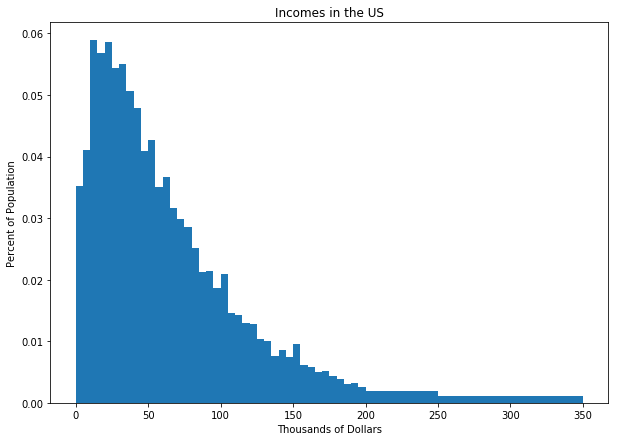

In [125]:
plt.figure(figsize=(10, 7))
plt.bar(income.mid / 1000, bar_height, width=widths, align='center')
plt.xlabel('Thousands of Dollars')
plt.ylabel('Percent of Population')
plt.title('Incomes in the US')
plt.show()

### (b)

In [164]:
# Define bin upper bounds
bins = np.zeros(42, dtype=np.float64)
bins[0] = 5000
# Middle range:
for i in range(1, 40):
    bins[i] = (income.mid[i] + income.mid[i+1])/2

bins[39] = 200000
bins[40] = 250000
bins[41] = np.inf

In [165]:
def model_moments(mu, sigma):
    pdf_vals = np.zeros(42, dtype=np.float64)
    dist_1 = sts.norm.cdf(np.log(bins), mu, sigma)
    bins_2 = np.roll(bins, 1)
    bins_2[0] = 1e-10
    dist_2 = sts.norm.cdf(np.log(bins_2), mu, sigma)
    pdf_vals = dist_1 - dist_2
    
    return pdf_vals 

In [166]:
def err_vec(data_dist, mu, sigma, simple):
    moms_data = data_dist
    moms_model = model_moments(mu, sigma)
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

In [167]:
def criterion(params, *args):
    mu, sigma = params
    data_dist, W = args
    err = err_vec(data_dist, mu, sigma, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err)
    
    return crit_val

In [168]:
mu_init = 4
sig_init = 1
params_init = np.array([mu_init, sig_init])
W_hat = np.diag(income.perc)
gmm_args = (income.perc, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results.x
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
print(results)

mu_GMM1= 10.7668436463  sig_GMM1= 0.907841391374
      fun: 0.045945282528530099
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -6.83481050e-07,   3.80251386e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 114
      nit: 11
   status: 0
  success: True
        x: array([ 10.76684365,   0.90784139])


In [169]:
def log_normal(xvals, mu, sigma):
    pdf_vals= (1/(xvals * sigma * np.sqrt(2 * np.pi)) *\
               np.exp(-(np.log(xvals) - mu)**2 /(2 * sigma**2)))
    return pdf_vals

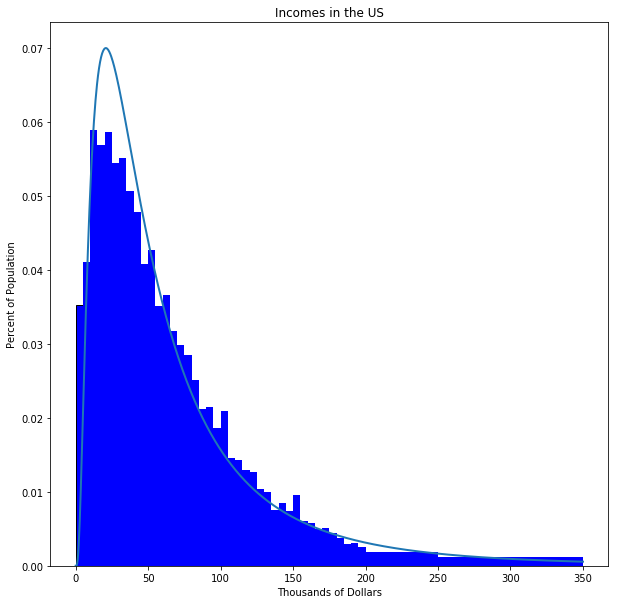

In [170]:
plt.figure(figsize=(10,10))
plt.bar(income.mid / 1000, bar_height, color='blue', edgecolor='k', align='center', width=widths)
plt.xlabel('Thousands of Dollars')
plt.ylabel('Percent of Population')
plt.title('Incomes in the US')

x = np.linspace(1e-5, 350000, 1000)
y = 5e3 * log_normal(x, mu_GMM1, sig_GMM1)
plt.plot(x / 1000, y, linewidth=2)
plt.show()

### (c)

In [181]:
def model_momentsGA(xvals, alpha, beta):
    pdf_vals = 1/((beta ** alpha) * math.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    
    return 5000 * pdf_vals

def err_vecGA(alpha, beta, perc, simple = False):
    modelpcts = model_momentsGA(income.mid, alpha, beta)
    if simple:
        err_vec1 = modelpcts - perc
    else:
        err_vec1 = (modelpcts - perc)/perc
    return err_vec1

def critGA(params, *args):
    alpha, beta = params
    pcts, W = args
    err = err_vecGA(alpha, beta, pcts)
    crit_val = np.dot(np.dot(err.T, W),err)
    return crit_val

In [182]:
alpha_init = 3.0
beta_init = 20000
params_init_c = np.array([alpha_init, beta_init])
gmm_args_c = (income.perc, W_hat)

results_c = opt.minimize(critGA, params_init_c, args=(gmm_args_c),
                       method='L-BFGS-B', bounds=((1e-8, None), (1e-8, None)))
alpha_gmm_c, beta_gmm_c = results_c.x

results_c

      fun: 0.044002400231443854
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -8.46961390e-06,  -2.08166817e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 108
      nit: 27
   status: 0
  success: True
        x: array([  1.42469112e+00,   4.50427298e+04])

In [187]:
def gamma_pdf(xvals, alpha, beta):
    pdf_vals = 1/((beta ** alpha) * math.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    
    return 5000 * pdf_vals

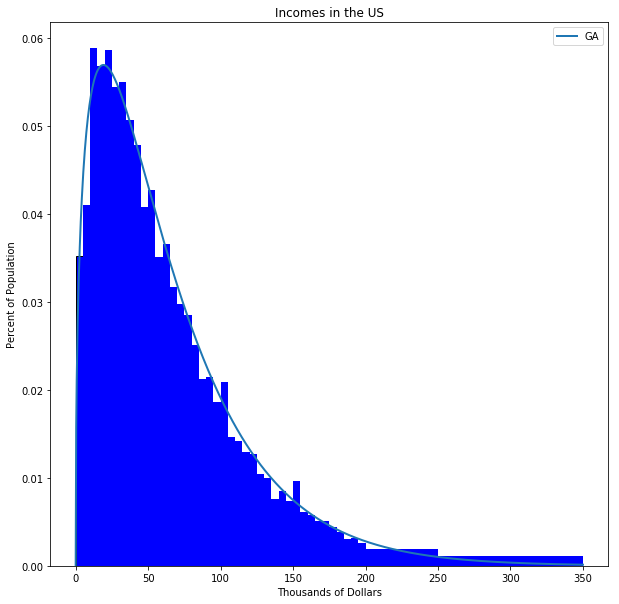

In [189]:
plt.figure(figsize=(10,10))
plt.bar(income.mid / 1000, bar_height, color='blue', edgecolor='k', align='center', width=widths)
plt.xlabel('Thousands of Dollars')
plt.ylabel('Percent of Population')
plt.title('Incomes in the US')

x = np.linspace(1e-5, 350000, 1000)
y2 = gamma_pdf(x, alpha_gmm_c, beta_gmm_c)
plt.plot(x / 1000, y2, linewidth=2, label="GA")
plt.legend()
plt.show()

### (d)

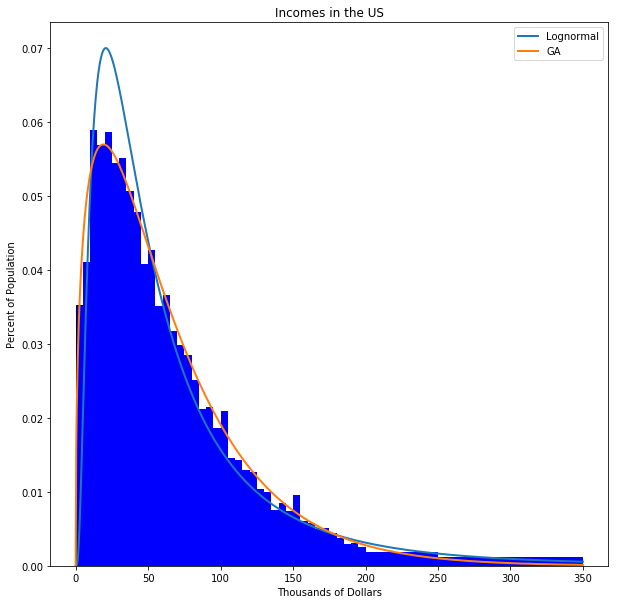

In [190]:
plt.figure(figsize=(10,10))
plt.bar(income.mid / 1000, bar_height, color='blue', edgecolor='k', align='center', width=widths)
plt.xlabel('Thousands of Dollars')
plt.ylabel('Percent of Population')
plt.title('Incomes in the US')

x = np.linspace(1e-5, 350000, 1000)
y = 5e3 * log_normal(x, mu_GMM1, sig_GMM1)
plt.plot(x / 1000, y, linewidth=2, label="Lognormal")
y2 = gamma_pdf(x, alpha_gmm_c, beta_gmm_c)
plt.plot(x / 1000, y2, linewidth=2, label="GA")
plt.legend()
plt.show()

The gamma distribution appears to fit the data better, as it more closely approximates the area where there are many observations (the lower end of the income distribution).

### (e)

In [206]:
alpha_init = 3.0
beta_init = 20000

params_init = np.array([alpha_init, beta_init])
gmm_args = (income.perc, np.eye(42))
results_Iden = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-8, None), (1e-8, None)))

alpha_GMM_Iden, beta_GMM_Iden = results_Iden.x

W_hat2 = (1/42) * (err_vec(income.perc, alpha_GMM_Iden, beta_GMM_Iden, False).values @ \
                   err_vec(income.perc, alpha_GMM_Iden,  beta_GMM_Iden, False).values)

gmm_args = (income.perc, W_hat2)

results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-8, None), (1e-8, None)))

alpha_GMM_2, beta_GMM_2 = results.x
results

      fun: 5109.7765017943102
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.89718480e-01,   1.81898940e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 21
      nit: 3
   status: 0
  success: True
        x: array([  9.99999994e-09,   1.99999966e+04])

## Problem 4
### (a)

In [209]:
# Load data and pull out columns
data = np.loadtxt('MacroSeries.txt', delimiter=",")
c = data[:, 0]
k = data[:, 1]
w = data[:, 2]
r = data[:, 3]

In [216]:
# Define functions
def get_z(r,k,alpha):
    z = np.log(r) - np.log(alpha) - (alpha - 1) * np.log(k)
    return z

def data_moments(c, k, w, r, alpha, beta, rho, mu):
    z = get_z(r, k, alpha)
    eq7 = z[1:] - rho * z[:-1] - (1 - rho) * mu
    eq8 = (z[1:] - rho * z[:-1] - (1 - rho) * mu) * z[:-1]
    eq9 = beta * alpha * np.exp(z[1:]) * k[1:] ** (alpha - 1) * c[:-1]/c[1:] - 1
    eq10 = (beta * alpha * np.exp(z[1:]) * k[1:] ** (alpha - 1) * c[:-1]/c[1:] - 1) * w[:-1]
    return eq7.mean(), eq8.mean(), eq9.mean(), eq10.mean()

def err_vec(c, k, w, r, alpha, beta, rho, mu, simple = True):
    mo_moments = np.zeros(4)
    da_moments = np.array(data_moments(c, k, w, r, alpha, beta, rho, mu)).reshape(1, 4)
    if simple:
        err_vec = (mo_moments - da_moments)[0]
    else:
        err_vec = (mo_moments - da_moments) / da_moments
    return err_vec

def crit(params, *args):
    alpha, beta, rho, mu = params
    c, k, w, r, weight  = args
    err = err_vec(c, k, w, r, alpha, beta, rho, mu)
    crit_val = np.dot(np.dot(err.T, weight), err) 
    return crit_val

In [217]:
W = np.eye(4)
alpha_init = 0.4
beta_init = 0.8
rho_init = 0.7
mu_init = 9

params_init = (alpha_init, beta_init, rho_init, mu_init)
args = (c, k, w, r, weight)
results = opt.minimize(crit, params_init, args=(args), 
                       bounds = ((1e-10, 0.9999), (1e-10, 0.9999), (-0.9999, 0.9999), (1e-10, None)), 
                       method = 'L-BFGS-B')
print(results)

      fun: 0.0021606411150718102
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.88857706e-02,   4.21106022e+03,   9.68262796e-05,
         7.44285970e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 350
      nit: 25
   status: 0
  success: True
        x: array([ 0.47201018,  0.99      ,  0.81071625,  9.00404255])
